In [1]:
import numpy as np
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
# Generate random data (RA, Dec) in degrees
np.random.seed(42)
n_points = 1000
ra = np.random.uniform(0, 360, n_points)
dec = np.random.uniform(-90, 90, n_points)

In [3]:
# Convert (RA, Dec) to (theta, phi) in radians
theta = np.radians(90 - dec)
phi = np.radians(ra)

In [4]:
# Healpix parameters
nside = 128
npix = hp.nside2npix(nside)
print(n_points/npix)
theta_pix = np.sqrt(hp.nside2pixarea(nside,degrees=True))
print(theta_pix)
# Convert (theta, phi) to pixel indices
pixel_indices = hp.ang2pix(nside, theta, phi)

selection = np.zeros(npix)
selection[pixel_indices] = 1.
print(sum(selection))

# Angular binning for correlation function
nbins = 20
theta_bins = np.linspace(theta_pix*np.pi/180, np.pi/36, nbins + 1)
print(theta_bins)

0.005086263020833333
0.4580648549089874
992.0
[0.00799474 0.01195833 0.01592191 0.0198855  0.02384908 0.02781267
 0.03177626 0.03573984 0.03970343 0.04366702 0.0476306  0.05159419
 0.05555777 0.05952136 0.06348495 0.06744853 0.07141212 0.0753757
 0.07933929 0.08330288 0.08726646]


In [5]:
# Compute the correlation function
correlation_counts = np.zeros(nbins)
pixel_counts = np.zeros(nbins)
for i in range(n_points):
    pixel_center = pixel_indices[i]
    neighbors = hp.query_disc(nside, hp.pix2vec(nside, pixel_center), np.pi/36.)  # Query the disc around the current pixel
    
    for neighbor in neighbors:
        sep = hp.rotator.angdist(hp.pix2ang(nside, pixel_center), hp.pix2ang(nside, neighbor))  # Calculate angular separation
        bin_index = np.searchsorted(theta_bins, sep)
        pixel_counts[bin_index - 1] += 1
        if selection[neighbor]==1. :
            correlation_counts[bin_index - 1] += 1  # Increment the count in the corresponding bin

print(correlation_counts)
print(pixel_counts)
# Normalize the correlation function
correlation_function = correlation_counts/pixel_counts

[  75.   53.   99.  101.  160.   85.  152.  175.  165.  206.  191.  213.
  290.  180.  252.  277.  295.  288.  310. 1312.]
[ 5424.  3618.  8971.  6381. 12236.  9259. 15492. 12488. 18606. 15165.
 21782. 18496. 25152. 20452. 28673. 24141. 31508. 27340. 34096. 32560.]


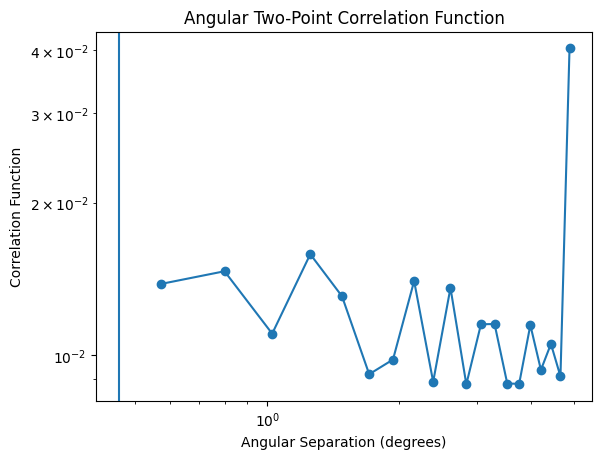

In [6]:
# Plot the correlation function
theta_mid = 0.5 * (theta_bins[1:] + theta_bins[:-1])
plt.axvline(theta_pix)
plt.plot(np.degrees(theta_mid), correlation_function, 'o-')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Angular Separation (degrees)')
plt.ylabel('Correlation Function')
plt.title('Angular Two-Point Correlation Function')
plt.show()